# Neural Networks Examples

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing, fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import r2_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# from keras.datasets import california_housing
from keras.models import Sequential
from keras.layers import Dense

## Example 1: Regression on California Housing Dataset

In [2]:

# Load the California housing dataset
X, y = fetch_california_housing(return_X_y = True, as_frame=True)

feature_names = list(X.columns)

display(X.head())
display(y.head())


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [3]:
display(X.info())
display(X.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


None

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)


In [5]:
linreg = LinearRegression()
linreg.fit(Xs_train, y_train)

y_linreg_train = linreg.predict(Xs_train)
y_linreg = linreg.predict(Xs_test)

R2_linreg_train = r2_score(y_train, y_linreg_train)
R2_linreg = r2_score(y_test, y_linreg)


print(f'LINEAR REGRESSION:\n\tTraining R2: {R2_linreg_train}\n\tTesting R2: {R2_linreg}')

LINEAR REGRESSION:
	Training R2: 0.6125511913966952
	Testing R2: 0.575787706032451


In [6]:
poly = PolynomialFeatures(degree=2)

Xp_train = poly.fit_transform(X_train)
Xp_test = poly.fit_transform(X_test)

ss_poly = StandardScaler()

Xps_train = ss_poly.fit_transform(Xp_train)
Xps_test = ss_poly.transform(Xp_test)

In [7]:
polyreg = LinearRegression()
polyreg.fit(Xps_train, y_train)

y_polyreg_train = polyreg.predict(Xps_train)
y_polyreg = polyreg.predict(Xps_test)

R2_polyreg_train = r2_score(y_train, y_polyreg_train)
R2_polyreg = r2_score(y_test, y_polyreg)


print(f'POLYNOMIAL REGRESSION:\n\tTraining R2: {R2_polyreg_train}\n\tTesting R2: {R2_polyreg}')

POLYNOMIAL REGRESSION:
	Training R2: 0.6852681982344955
	Testing R2: 0.6456819729262011


In [8]:

# Build the neural network model
mlp = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1)
])

# Compile the model
mlp.compile(optimizer='adam', loss='mse')

# Train the model
mlp.fit(Xs_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

# Predict values for training and test sets
y_mlp_train = mlp.predict(Xs_train)
y_mlp = mlp.predict(Xs_test)

R2_mlp_train = r2_score(y_train, y_mlp_train)
R2_mlp = r2_score(y_test, y_mlp)


print(f'MLP REGRESSION:\n\tTraining R2: {R2_mlp_train}\n\tTesting R2: {R2_mlp}')


/Users/eatai/.pyenv/versions/3.9.21/envs/tf/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  1/516 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step

303/516 ━━━━━━━━━━━━━━━━━━━━ 0s 166us/step

516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step


  1/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step


MLP REGRESSION:
	Training R2: 0.7128819440263263
	Testing R2: 0.6975734274406061


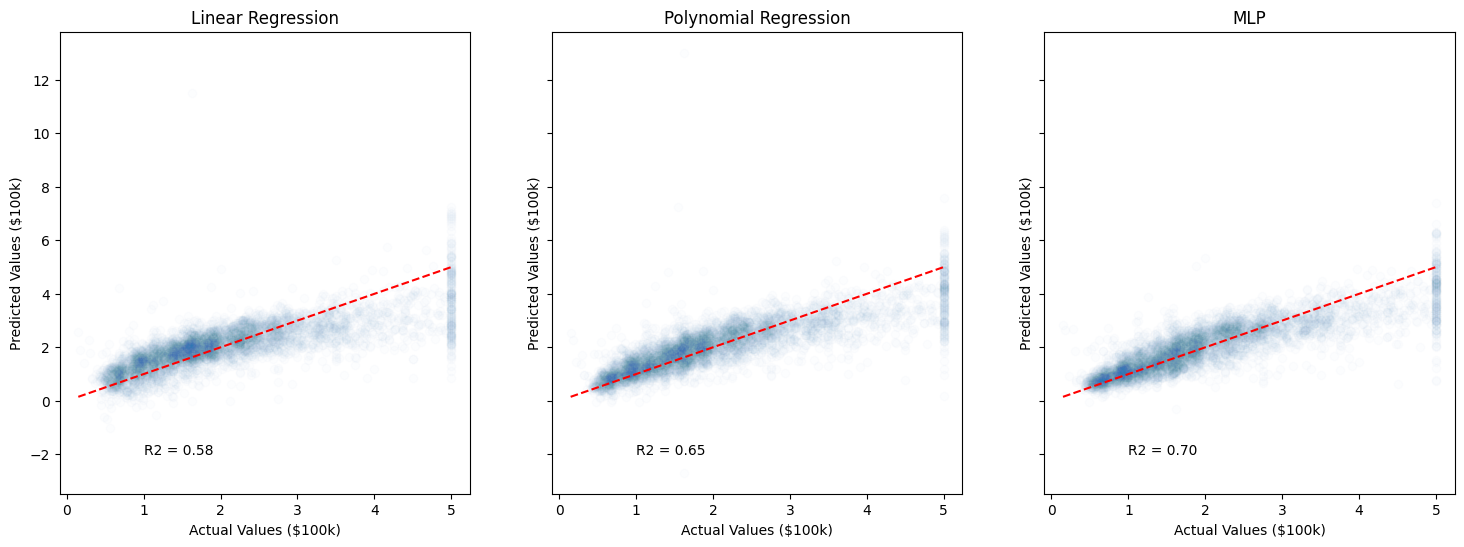

In [9]:
fig, ax = plt.subplots(1,3, figsize = (18, 6), sharey = True, sharex = True)
# Plot the predicted vs actual values for the training set

ax[0].scatter(y_test, y_linreg, alpha = 0.01)
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax[0].set_xlabel('Actual Values ($100k)')
ax[0].set_ylabel('Predicted Values ($100k)')
ax[0].set_title('Linear Regression')
ax[0].text(1, -2, f'R2 = {R2_linreg:.2f}')

ax[1].scatter(y_test, y_polyreg, alpha = 0.01)
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax[1].set_xlabel('Actual Values ($100k)')
ax[1].set_ylabel('Predicted Values ($100k)')
ax[1].set_title('Polynomial Regression')
ax[1].text(1, -2, f'R2 = {R2_polyreg:.2f}')


ax[2].scatter(y_test, y_mlp, alpha = 0.01)
ax[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax[2].set_xlabel('Actual Values ($100k)')
ax[2].set_ylabel('Predicted Values ($100k)')
ax[2].set_title('MLP')
ax[2].text(1, -2, f'R2 = {R2_mlp:.2f}')

plt.show()

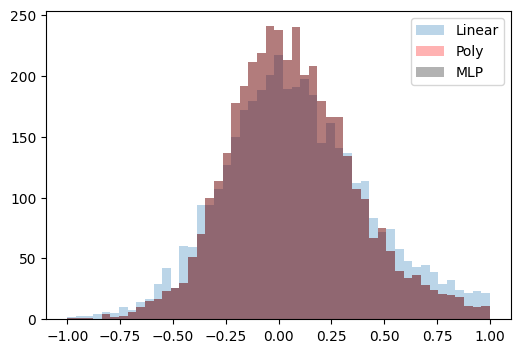

In [10]:
def percent_error(y_true, y_pred):
    return (y_pred-y_true)/y_true

linreg_err = percent_error(y_test, y_linreg)
polyreg_err = percent_error(y_test, y_polyreg)
mlp_err = percent_error(y_test, y_polyreg)

fig, ax = plt.subplots(1,1, figsize = (6, 4), sharey = True, sharex = True)
# Plot the predicted vs actual values for the training set

alpha = 0.3
bins = np.linspace(-1, 1, 50)
ax.hist(linreg_err, bins = bins, alpha = alpha, label = 'Linear')
ax.hist(polyreg_err, bins = bins, alpha = alpha, color = 'r', label = 'Poly')
ax.hist(mlp_err, bins = bins, alpha = alpha, color = 'k', label = 'MLP')

plt.legend()
plt.show()

## Example 2: Predicting Forest Cover Type





In [11]:
X, y = fetch_covtype(return_X_y=True, as_frame=True)
feature_names = list(X.columns)

display(X.head())
display(y.head())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int32